# ★ Solving Equations ★

# 1.1 The Bisection Method

In [255]:
# Import modules
import traceback
import math
import numpy as np
import scipy
import scipy.linalg as LA
import matplotlib.pyplot as plt

In [9]:
def bisect(f,a,b,tol):
    """
    Computes approximate solution of f(x)=0
    
    Args:
        f (function prototype) : function handle 
        a (float) : left bound of the interval
        b (float) : right bound of the interval
        tol (float) : tolerance
        
    Returns:
        Approximate solution x
        
    Raises:
        ValueError:
            - a * b must be smaller than zero
            - a > b will be considered to be wrong
    """
    try:
        if a > b :
            raise ValueError('a must be <= b')
        
        fa = f(a)
        fb = f(b)
        
        if np.sign(fa) * np.sign(fb) >= 0 :
            raise ValueError('It must be verified that f(a) * f(b) < 0')
            
        while (b - a) / 2 > tol :
            # Find the intermediate point  
            c = (a + b) / 2
            fc = f(c)
            if fc == 0 :
                return c
            elif fa * fc < 0 :
                b = c
                fb = fc
            else :
                a = c
                fa = fc
                
        return (a + b) / 2
            
    except ValueError as e :
        print('ValueError Exception : ', e)
        traceback.print_exception()
    

### Example
find a root of $f(x) = x^3 + x - 1$ on the interval $[0 , 1]$

In [25]:
f = lambda x : math.pow(x,3) + math.pow(x,1) - 1
tolerance = 0.0005
xc = bisect(f,0,1,tolerance)
print('%f ~ %f' %(xc - tolerance, xc + tolerance))

0.681629 ~ 0.682629


### Definition
A solution is ** correct within  $p$ decimal places ** if the error is less than $0.5 \times 10^{-p}$

### Example
find a root of $f(x) = cosx - x$ in the interval $[0,1]$ to within six correct places

In [55]:
f = lambda x : math.cos(x) - x
tolerance = 1e-7
xc = bisect(f,0,1,tolerance)
print(round(xc,6))

0.739085


## 1.1 Computer Problems

Use the Bisection Method to ﬁnd the root to eight correct decimal place
- (a) $x^5 + x = 1$
- (b) $sinx = 6x +5$
- (c) $lnx + x^2 = 3$

In [181]:
fa = lambda x : math.pow(x,5) + x - 1
fa_xc = bisect(fa,0,1,1e-9)
print('(a) x =',round(fa_xc,8))
fb = lambda x : math.sin(x) - 6 * x - 5
fb_xc = bisect(fb,-1,0.5,1e-9)
print('(b) x =',round(fb_xc,8))
fc = lambda x : math.log(x) + math.pow(x,2) - 3
fc_xc = bisect(fc,1,2,1e-9)
print('(c) x =',round(fc_xc,8))

(a) x = 0.75487767
(b) x = -0.97089892
(c) x = 1.59214294


---
Sketch the function and identify three intervals of length one that contain a root.
Then find the roots to six correct decimal places.
- (a) $2x^3 - 6x - 1 = 0$
- (b) $e^{x-2} + x^3 - x = 0$
- (c) $1 + 5x - 6x^3 - e^{2x} = 0$

In [97]:
def generate_points(f,xs):
    ys = np.zeros(xs.size)
    for i in range(len(xs)):
        ys[i] = f(xs[i])
    return ys

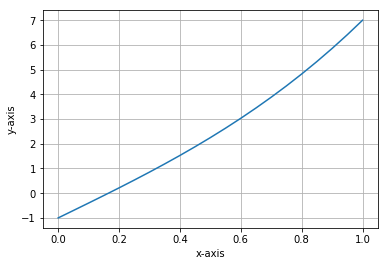

x = 0.165165


In [183]:
fa = lambda x : 2 * math.pow(x,3) + 6 * x - 1
xs = np.linspace(0,1,21)
ys = generate_points(fa,xs)
plt.plot(xs,ys)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.grid(True)
plt.show()

fa_xc = bisect(fa,0,1,1e-7)
print('x =',round(fa_xc,6))

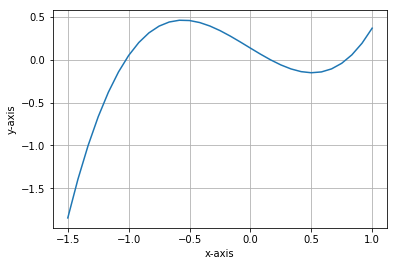

x = -1.023482
x = 0.163822
x = 0.788941


In [185]:
fb = lambda x : math.exp(x - 2) + math.pow(x,3) - x
xs = np.linspace(-1.5,1,31)
ys = generate_points(fb,xs)

plt.plot(xs,ys)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.grid(True)
plt.show()

fb_xc = bisect(fb,-1.5,-0.5,1e-7)
print('x =',round(fb_xc,6))
fb_xc = bisect(fb,-0.5,0.5,1e-7)
print('x =',round(fb_xc,6))
fb_xc = bisect(fb,0.5,1.5,1e-7)
print('x =',round(fb_xc,6))

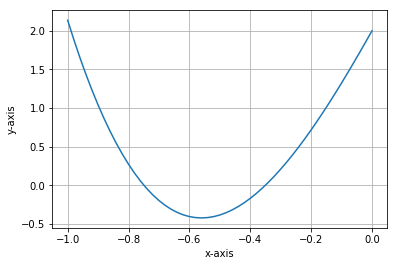

x = -0.351014
x = -0.749061


In [195]:
fc = lambda x : 1 + 5 * x - 6 * math.pow(x,3) + math.exp(2 * x) 
xs = np.linspace(-1,0,51)
ys = generate_points(fc,xs)

plt.plot(xs,ys)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.grid(True)
plt.show()

fc_xc = bisect(fc,-0.5,0.5,1e-7)
print('x =',round(fc_xc,6))
fc_xc = bisect(fc,-1.5,-0.5,1e-7)
print('x =',round(fc_xc,6))

---
The **Hilbert Matrix**  is the n × n matrix whose ijth entry is $\frac{1}{i + j - 1}$. Let $A$ denote the
5 × 5 Hilbert matrix. Its largest eigenvalue is about 1.567. Use the Bisection Method to decide
how to change the upper left entry $A_{11}$ to make the largest eigenvalue of $A$ equal to $\pi$.

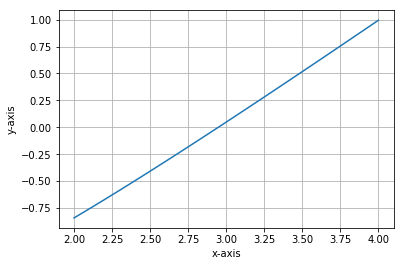

Make A[1,1] to be 2.948011 to make the largest eigenvalue equal to pi


In [256]:
def rev_hilbert_matrix_eigvals(upper_left_element):
    hilbert_matrix = LA.hilbert(5)
    hilbert_matrix[0][0] = upper_left_element
    return LA.eigvals(hilbert_matrix)

f = lambda x : np.max(rev_hilbert_matrix_eigvals(x)).real - scipy.pi
xs = np.linspace(2,4,21)
ys = generate_points(f,xs)

plt.plot(xs,ys)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.grid(True)
plt.show()

xc = bisect(f,2.5,3.5,1e-7)
print('Make A[1,1] to be',round(xc,6),'to make the largest eigenvalue equal to pi')